
# CPE 313 : Advanced Machine Learning with Deep Learning
## HOA 1.1 Using Tensorflow with a Real Dataset

*   **Name:** Tacsay, Marie Emmanuelle
*   **Section:** CPE32S8

---



# Linear Regression with a Real Dataset

This Colab uses a real dataset to predict the prices of houses in California.   






## Learning Objectives:

After doing this Colab, you'll know how to do the following:

* Demonstrate csv file manipulation using Pandas.
* Examine a given data.
* Experiment with different features in building a model.
* Demonstrate tuning a model's hyperparameters.

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [1]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## The dataset

Datasets are often stored on disk or at a URL in [.csv format](https://wikipedia.org/wiki/Comma-separated_values).

A well-formed .csv file contains column names in the first row, followed by many rows of data.  A comma divides each value in each row. For example, here are the first five rows of the .csv file holding the California Housing Dataset:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`):

In [2]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Scaling `median_house_value` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

Although scaling a label is usually *not* essential, scaling features in a multi-feature model usually *is* essential.

## Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column.

* `mean` and `std`, which contain the mean and standard deviation of the values in each column.

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [3]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Task 1: Identify anomalies in the dataset

**Do you see any anomalies (strange values) in the data?**

**Answer:** On the table above which shows the data, there is a anomaly value. The max value that can be seen on the table is 37, 937 which is a huge number and may affect the performance and results when this data will be train in the model. Identifying some anomalies would be helpful since this would lead to not choosing the column with the anomaly value to prevent inaccuracy brought by the huge gap made by this anomaly value when correlated to other data.

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

In [4]:
#importing needed libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.experimental import RMSprop
from tensorflow.keras.metrics import RootMeanSquaredError

In [5]:
#first function
def build_model(my_learning_rate): #defining the function
  model = Sequential() #from the module keras which allows to let user to do
                  #sequential layers or stacks to build a neural network model

  model.add(Dense(units = 1, input_shape = (1,))) #adding layer
  #Dense() is a function used to add a dense layer to the neural network model
  #parameter unit is used to indicate the number of neurons in the
  #layer or the output dimension

  model.compile(optimizer = RMSprop(learning_rate = my_learning_rate),
                loss = 'mean_squared_error',
                metrics = RootMeanSquaredError()) #compile the model
  #compiling the model used together with the optimizer and metrics that
  #would be use for linear regression

  return model #return the model


#second function
def train_model(model, df, feature, label, epochs, batch_size):
  #defing the function
  record = model.fit(x = df[feature], y = df[label], batch_size = batch_size,
                     epochs = epochs) #.fit() function would train the data
  #the parameters would gather the data of the dataframe
  #that will be put in the function
  #the data would pass based on the assigned variables,
  # which is in this code are x and y
  #batch_size are sample size that will be use in training model
  #epochs are the number of iterations made


  tr_weight = model.get_weights()[0] #weight
  tr_bias = model.get_weights()[1] #bias

  epochs = record.epoch #iterations

  rec = pd.DataFrame(record.history) #storing the output of the
  #record variable in the dataframe

  rmse = rec['root_mean_squared_error']  #isolating the rmse values from the
  #records of training the data to monitor progress

  return tr_weight, tr_bias, epochs, rmse #return the values listed

## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

In [6]:
def plot_model(tr_weight, tr_bias, feature, label):
  # Label the axes
  plt.xlabel(feature)
  plt.ylabel(label)

  random = training_df.sample(n=500) #randomly select 500 features
  #to be used in training the model

  #plotting the scatter plots
  #features and labels as the variables x and y
  plt.scatter(random[feature], random[label]) #the data are randomly
  #selected because of the previous code line

  # Create the model's line, starting at (0, bias)
  #and ending at (max_feature, predicted_max_label)
  x0 = 0
  y0 = tr_bias
  x1 = random[feature].max()  # Assuming feature is sorted in ascending order
  #getting the last element which is assumed as the maximum value
  y1 = tr_bias + (tr_weight * x1)  #linear regression model equation
  #equation is used to calculate the predicted label for the maximum feature
  #value using the model's weight and bias
  plt.plot([x0, x1], [y0, y1], c='r', label='Model')
  # #this will plot thye prediction line (colored red)

  plt.legend() #legend

  # Display the plot
  plt.show()

def loss_curve(epochs, rmse): #function to plot the loss curve
  plt.figure()
  plt.xlabel('Epoch') #x-label
  plt.ylabel('Root Mean Squared Error') #y-label

  plt.plot(epochs, rmse, label= 'Loss') #plots the epochs and rmse together
  #and the line is labeled as "Loss"

  plt.legend() #legend

  plt.ylim([rmse.min()*0.97, rmse.max()])
  #it states the limitation of the y-axis
  #the lower y-axis limit would be the 97%of the minimum value in the rmse
  #while the upper y-axis limit would be the maximum value in the rmse
  plt.show() #shows the plot


In [7]:
training_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
16995,-124.3,40.6,52.0,2217.0,394.0,907.0,369.0,2.4,111.4
16996,-124.3,40.7,36.0,2349.0,528.0,1194.0,465.0,2.5,79.0
16997,-124.3,41.8,17.0,2677.0,531.0,1244.0,456.0,3.0,103.6
16998,-124.3,41.8,19.0,2672.0,552.0,1298.0,478.0,2.0,85.8


## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature.


In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms" #the total number of rooms on a specific city block.
my_label="median_house_value"
#the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )


Epoch 1/30
567/567 [==============================] - 2s 3ms/step - loss: 1598746.5000 - root_mean_squared_error: 1264.4155
Epoch 2/30
567/567 [==============================] - 1s 3ms/step - loss: 27979.4375 - root_mean_squared_error: 167.2706
Epoch 3/30
567/567 [==============================] - 2s 3ms/step - loss: 26990.4336 - root_mean_squared_error: 164.2877
Epoch 4/30
567/567 [==============================] - 2s 3ms/step - loss: 26251.6504 - root_mean_squared_error: 162.0236
Epoch 5/30
567/567 [==============================] - 2s 3ms/step - loss: 25493.3828 - root_mean_squared_error: 159.6665
Epoch 6/30
567/567 [==============================] - 2s 3ms/step - loss: 25060.6328 - root_mean_squared_error: 158.3055
Epoch 7/30
567/567 [==============================] - 2s 4ms/step - loss: 24037.8770 - root_mean_squared_error: 155.0415
Epoch 8/30
567/567 [==============================] - 2s 3ms/step - loss: 23513.3711 - root_mean_squared_error: 153.3407
Epoch 9/30
567/567 [=========

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


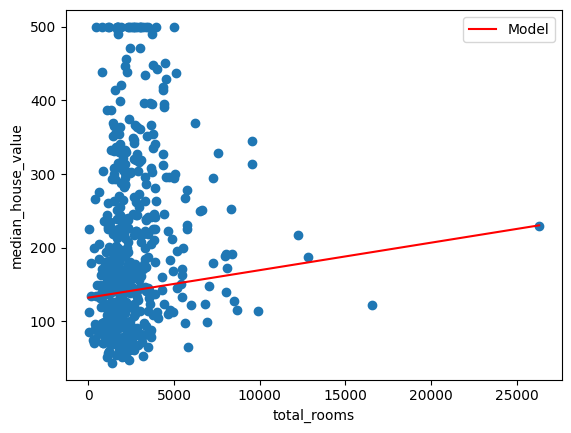

In [9]:
plot_model(weight, bias, my_feature, my_label) #calling the function to plot the data

**Analysis:** In the graph above, it shows the relation between the median_house_value and total_rooms. The graph visualuize a positive correlation between the two variables creating a line (red line) that is going up or show increase when one variable increases. Also, the points in the scatter plot are compiled in one part of the graph showing that majority of the data are close to each other and no variations are shown on the data.

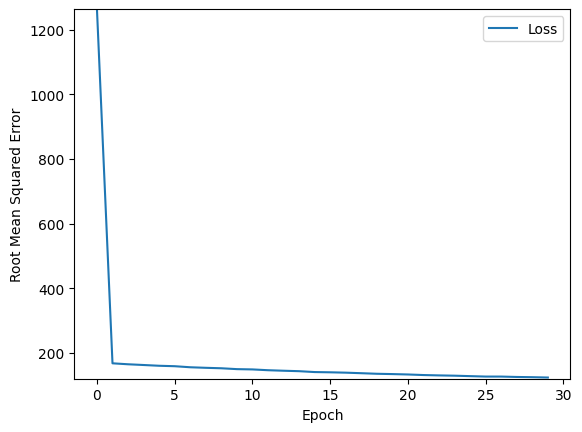

In [10]:
loss_curve(epochs, rmse) #calling the function to plot the loss curve

**Analysis:** The graph above shows the relationship between RMSE and Epoch (Number of iterations). Based on the graph, RMSE values decreases as the iterations (epochs) is increasing. This shows an indirect relation between these two variables. With this, it states that more iterations would likely to generate a lower result or value of RMSE.

A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model. That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [11]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

Now, invoke the house prediction function on 10 examples:

In [12]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             139
 3400     92             145
 3677     69             146
 2202     62             140
 2403     80             141
 5652    295             153
 3318    500             145
 2552    342             142
 1364    118             137
 3468    128             145


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?  

**Answer:** The predicted value seems to be significantly different from the label value beacuse of the huge gap between the mentioned values being compared. Some of the predicted values are huge and some doesn't even reach the label value creating this huge gap between their values. This mean that the model didn't properly predict the 10 values passed to the function. These results is not enough to conclude about the model which means that changes is recommended to see and compare performance and choose the best one.

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`.

Note: When you change features, you might also need to change the hyperparameters.

Epoch 1/3
142/142 [==============================] - 0s 1ms/step - loss: 3574908.7500 - root_mean_squared_error: 1890.7429
Epoch 2/3
142/142 [==============================] - 0s 1ms/step - loss: 3232044.5000 - root_mean_squared_error: 1797.7888
Epoch 3/3
142/142 [==============================] - 0s 1ms/step - loss: 3188586.5000 - root_mean_squared_error: 1785.6614


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


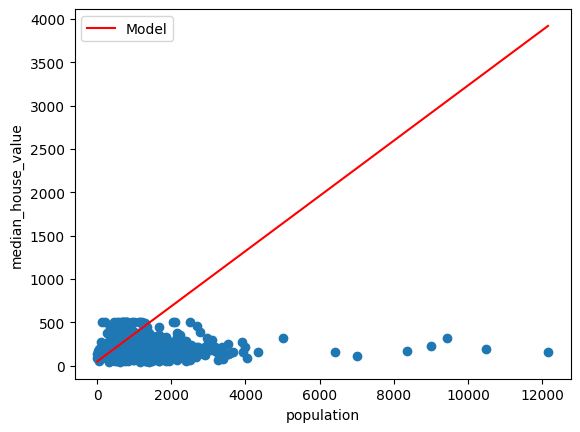

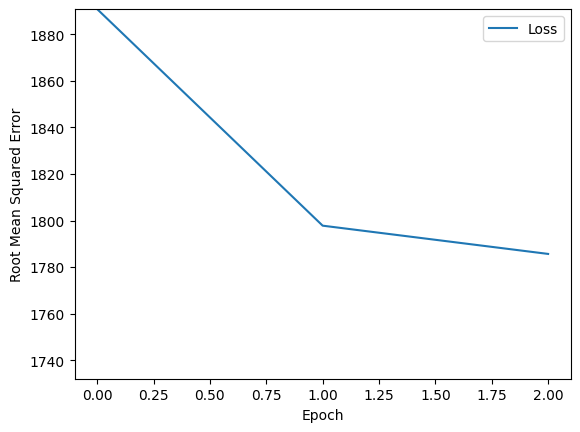

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             457
 1867     92             642
 2191     69             745
 1052     62             382
 1647     80             572
 2312    295             784
 1604    500             558
 1066    342             387
  338    118             155
 1604    128             558
 1200    187             430
  292     80             140
 2014    112             689
 1817     95             626
 1328     69             470


In [13]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_model(weight, bias, my_feature, my_label)
loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

**Analysis:** The graphs and table above shows the prediction and relationship of median_house_value and population. These data were trained using the model however, hyperparamters were changed. With this it is evident that the feature value is not compatible with each other. The graph above shows how the mentioned columns were used and their reslationship with each other. Also, the table above shows that the label and predicted values are not close with each other which has problems regarding predictions

Epoch 1/18
5667/5667 [==============================] - 9s 2ms/step - loss: 33266.3906 - root_mean_squared_error: 182.3908
Epoch 2/18
5667/5667 [==============================] - 9s 2ms/step - loss: 19874.1562 - root_mean_squared_error: 140.9757
Epoch 3/18
5667/5667 [==============================] - 8s 1ms/step - loss: 18045.2969 - root_mean_squared_error: 134.3328
Epoch 4/18
5667/5667 [==============================] - 9s 2ms/step - loss: 18017.2480 - root_mean_squared_error: 134.2283
Epoch 5/18
5667/5667 [==============================] - 9s 2ms/step - loss: 18015.7168 - root_mean_squared_error: 134.2226
Epoch 6/18
5667/5667 [==============================] - 8s 1ms/step - loss: 18046.0527 - root_mean_squared_error: 134.3356
Epoch 7/18
5667/5667 [==============================] - 9s 2ms/step - loss: 17956.2520 - root_mean_squared_error: 134.0009
Epoch 8/18
5667/5667 [==============================] - 9s 2ms/step - loss: 18056.0137 - root_mean_squared_error: 134.3727
Epoch 9/18
5667/

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


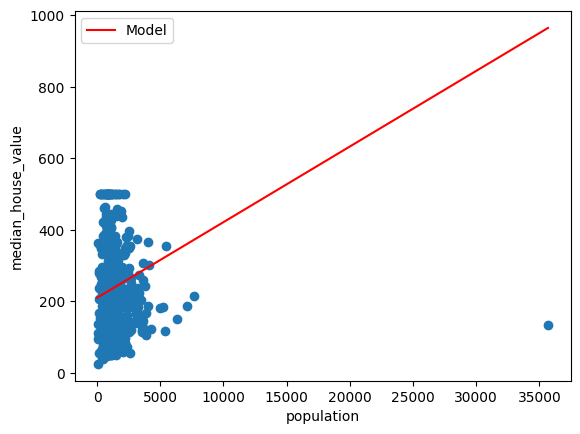

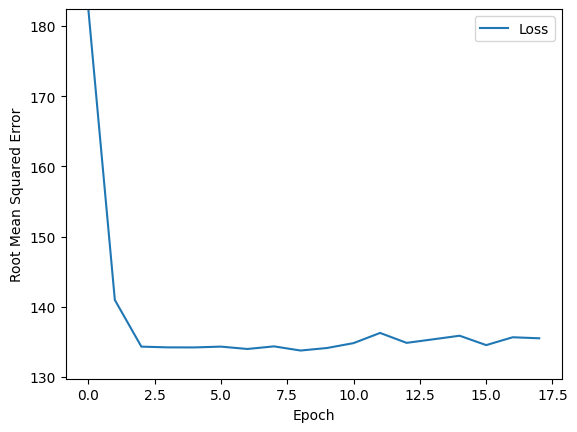

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             237
 1867     92             249
 2191     69             256
 1052     62             232
 1647     80             245
 2312    295             259
 1604    500             244
 1066    342             232
  338    118             217
 1604    128             244


In [14]:
my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_model(weight, bias, my_feature, my_label)
loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

**Analysis:** The graph above shows a posoitive correlation between the same two variables. This is because the hyperparamters were changed into different values generating this result. Also, the loss curve shows a unstable line since there are curves as the iteration (epochs) increases. This mean that the rmse significantly changes when epochs increase. In addition, the table above shows that the predicted values are not close enough to the label values describing that the model didn't predicted the data based on the input columns.

Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 269674.2500 - root_mean_squared_error: 519.3017
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 30531.3359 - root_mean_squared_error: 174.7322
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 29777.5820 - root_mean_squared_error: 172.5618
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 29077.3164 - root_mean_squared_error: 170.5207
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 28167.8027 - root_mean_squared_error: 167.8327
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 27385.2266 - root_mean_squared_error: 165.4848
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 26660.9219 - root_mean_squared_error: 163.2817
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 25872.4551 - root_mean_squared_error: 160.8492
Epoch 9/30
567/567 [===========

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


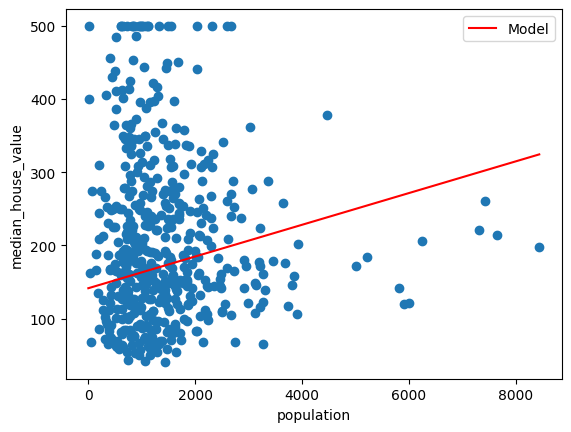

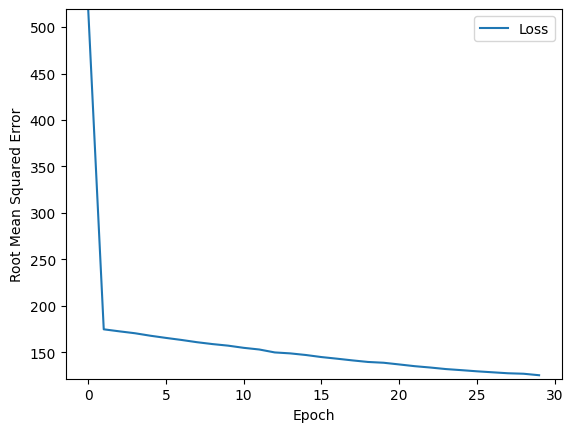

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             169
 1867     92             182
 2191     69             189
 1052     62             164
 1647     80             177
 2312    295             192
 1604    500             176
 1066    342             165
  338    118             149
 1604    128             176


In [15]:
my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_model(weight, bias, my_feature, my_label)
loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

**Analysis:** Based on the graph, just like the previous graphs, this graphs also shows a positive correlation between the variables being used. Also the columns used are the same but the hyperparameters were changed. Also, the data points are compiled in one direction. The table shows the predicted and label values which is also shows that these two variables is not compatible because of the siginificant difference between the label and predicted values making the model unable to give better predictions using the data.

Did `population` produce better predictions than `total_rooms`?

**Answer:** Using population as the "my_feature" column gives different results than the total_rooms. Based on the results generated by the model, using population as the "my_feature" column is not a good choice since the predicted vfalues and label values have this siginificantly large gap between them. It is also evident that using population would generate a large number of predicted values when compared to the label values which is slightly larger when using total_rooms making this feature also not a good choice in training and predicting the data.

## Task 4: Define a synthetic feature

You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following:

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces
   a lower loss value than any of the single features you
   tried earlier in this exercise.

Epoch 1/24
567/567 [==============================] - 1s 2ms/step - loss: 38499.3516 - root_mean_squared_error: 196.2125
Epoch 2/24
567/567 [==============================] - 1s 2ms/step - loss: 19161.6992 - root_mean_squared_error: 138.4258
Epoch 3/24
567/567 [==============================] - 1s 2ms/step - loss: 15134.6152 - root_mean_squared_error: 123.0228
Epoch 4/24
567/567 [==============================] - 1s 1ms/step - loss: 14857.7432 - root_mean_squared_error: 121.8923
Epoch 5/24
567/567 [==============================] - 1s 1ms/step - loss: 14679.1289 - root_mean_squared_error: 121.1575
Epoch 6/24
567/567 [==============================] - 1s 1ms/step - loss: 14462.5703 - root_mean_squared_error: 120.2604
Epoch 7/24
567/567 [==============================] - 1s 1ms/step - loss: 14289.4277 - root_mean_squared_error: 119.5384
Epoch 8/24
567/567 [==============================] - 1s 1ms/step - loss: 14196.6035 - root_mean_squared_error: 119.1495
Epoch 9/24
567/567 [============

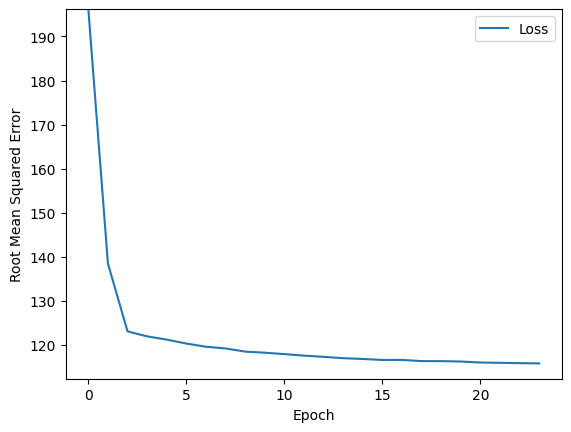

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             189
    2     92             201
    2     69             195
    2     62             211
    1     80             186
    2    295             225
    2    500             210
    2    342             223
    4    118             289
    2    128             214
    2    187             224
    3     80             235
    2    112             225
    2     95             219
    2     69             211


In [16]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"] / \
 training_df["population"] # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

**Analysis:** The graph above shows the loss curve when the model is being trained using the assigned hyperparameters. Also, the feature value or column were changed and it was replaced by a synthetic data which is the ratio of two columns which are , total_rooms and rooms_per_person. Through the results, it is evident that using synthetic data or feature shows a better result than using the original or real one. But the model still doesn't process the data better and give better predictions.

Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.


## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * `0.0`: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [17]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


**Analysis:** The table above shows the correlation of each columns. There are variations of values and varies in terms of relationship or correlation(positive or negative). Closer to 1 shows positive correlation while negative ones shows negative correlation. Using median_house_value as the label value or columns, it is evident that the median_income would be the best pair or feature column for the model to train. It is because they have 0.7 correlation value which is a positive correlation.

The correlation matrix shows nine potential features (including a synthetic
feature) and one label (`median_house_value`).  A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.  

**Your Task:** Determine which of the nine potential features appears to be the best candidate for a feature?

Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 51269.7812 - root_mean_squared_error: 226.4283
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 39916.1016 - root_mean_squared_error: 199.7901
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 30188.5098 - root_mean_squared_error: 173.7484
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 22201.9941 - root_mean_squared_error: 149.0033
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 15978.8164 - root_mean_squared_error: 126.4073
Epoch 6/30
567/567 [==============================] - 1s 2ms/step - loss: 11417.5791 - root_mean_squared_error: 106.8531
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 8533.5283 - root_mean_squared_error: 92.3771
Epoch 8/30
567/567 [==============================] - 1s 2ms/step - loss: 7270.6113 - root_mean_squared_error: 85.2679
Epoch 9/30
567/567 [================

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


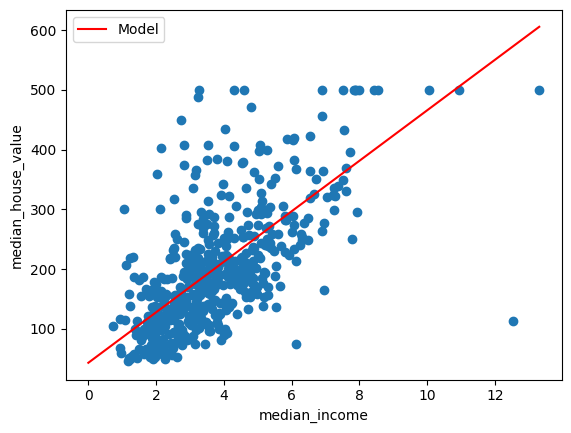

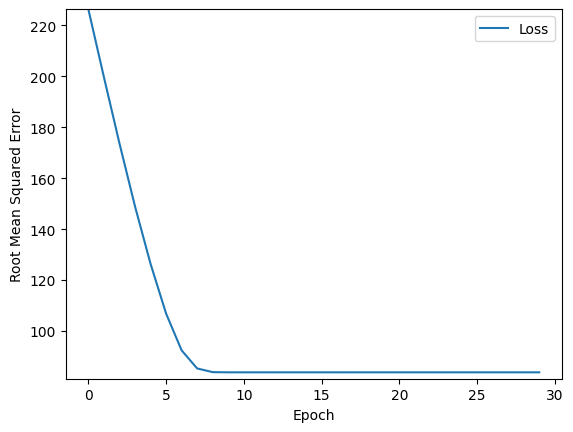

In [18]:
my_feature = "median_income" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_model(weight, bias, my_feature, my_label)
loss_curve(epochs, rmse)

In [19]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             134
    4     92             212
    3     69             154
    2     62             132
    3     80             153
    2    295             148
   10    500             457
    5    342             260
    2    118             147
    4    128             221


**Analysis:** Based from the correlation table generated, median_income has the highest correlation of 0.7 when paired to median_hous_value column. This means that these two columns have a positive correlation which is a good indication of a good prediction results when these two columns would be put in the model. Based on the results generated when the data from the median_income and media_house_value there are predicted valus that are closely reaching or have the small gap when compared to label values. This means that training these two columns generate a more accurate predictions compared when using other features. With this, it is evident that using "median_income" as the feature and "median_house_value" as the label would create a positive correlation with each other as well as it will give more a accuracte predictions because the label and feature are closely related and have small gaps between them which is better than using other columns as the feature.

Correlation matrices don't tell the entire story. In later exercises, you'll find additional ways to unlock predictive power from potential features.

**Note:** Using `median_income` as a feature may raise some ethical and fairness
issues. Towards the end of the course, we'll explore ethical and fairness issues.

### **Conclusion:**
In this activity, we were tasked to create our own model from scratch using Tensorfllow and Keras. Learning this concept would allow us to improve our skills and understanding about machine learning. Also, this activity has its objective in creating linear regression model from scratch using the mentioned modules or libraries of Python. It was challenging at first but reading some resirces on how to create a model is a big help in doing this activity. In addition, learning this concept would help us to understand the models that we have used from the previous course (Data Science 2) and how they behave. Also, this would help us to make our own model which is easier to modify and put changes because it was made from scratch. Looking back to the activity, we've also did some training of data using the model that we have created, determining the best feature that could use to generate a better accurate predictions and creating analysis for the plots that we have created. Through the correlation table, the feature that is best to use was determined and was proved through training the data that they have. Comparing the results help to further understand and analyze the data which lead us to choose the best route. As it was stated above, from the correlation table it was evident that the "median_income" has the positive correlation of 0.7 with the used label value ("median_house_value"). It was further proved when the data were put in the created model, trained, and predicted the values which generated a better results compared to other which used different features. Overall, this activity is a new concept for us to begin creating our own model and have the freedom to manipulate operations in order to achive the goal that we want. Heading towards deep learning would be a challenging part in learning machine learning but it will be worth it seeing that these concepts would be a good start in solving problems using technology and data.

In [20]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Colab Link:** https://colab.research.google.com/drive/10g2htYcXDllm2rw6QF8DG3zmX4O0BiSm?usp=sharing

### **"I affirm that I shall not give or receive any unauthorized help on this assignment and that all work is my own”**

